In [19]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 애플 폰트(Nanum Apple Font) 사용 설정
rc('font', family='Apple SD Gothic Neo')

In [4]:
START = "2018-01-01"
END = "2023-02-01"
SYMBOL = ["TSLA", "AAPL", "META", "GOOG"]

df = yf.download(SYMBOL, start=START, end=END, period='1d', interval='1d', ignore_tz=True)

[*********************100%***********************]  4 of 4 completed


In [14]:
data = df['Close']
data = data.copy()
data.head()

,AAPL,GOOG,META,TSLA
Date,,,,
2018-01-02,43.064999,53.250000,181.419998,21.368668
2018-01-03,43.057499,54.124001,184.669998,21.150000
2018-01-04,43.257500,54.320000,184.330002,20.974667
2018-01-05,43.750000,55.111500,186.850006,21.105333
2018-01-08,43.587502,55.347000,188.279999,22.427334


In [8]:
data.pct_change().round(3).head()

,AAPL,GOOG,META,TSLA
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000,0.016,0.018,-0.010
2018-01-04,0.005,0.004,-0.002,-0.008
2018-01-05,0.011,0.015,0.014,0.006
2018-01-08,-0.004,0.004,0.008,0.063


<Axes: xlabel='Date'>

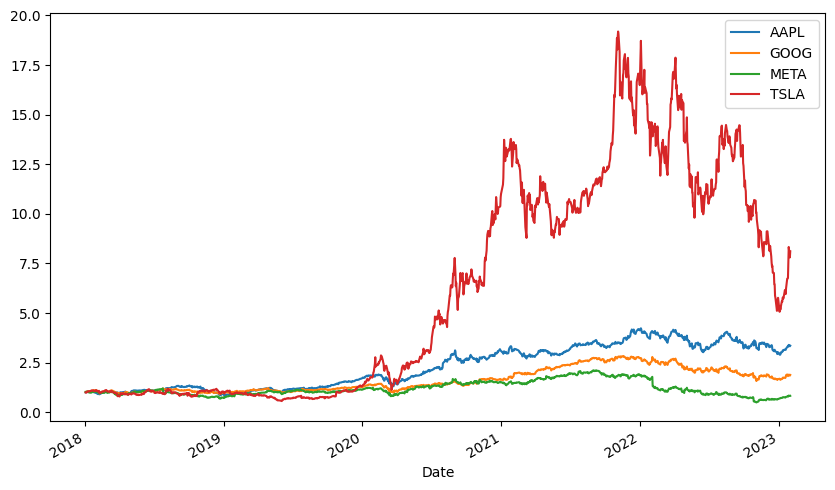

In [9]:
rets = np.log(data / data.shift(1))
rets.round(3).head()
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

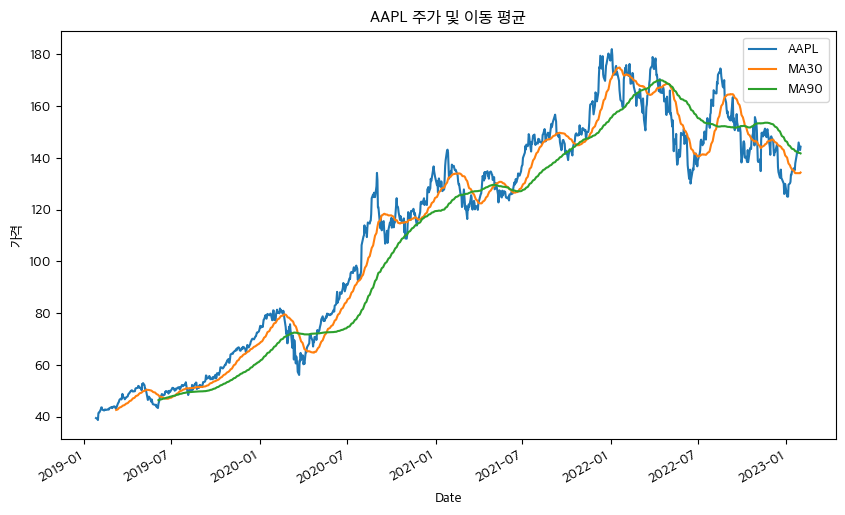

In [20]:
sym = "AAPL"
data.dropna(inplace=True)
data['MA30'] = data[sym].rolling(window=30).mean()
data['MA90'] = data[sym].rolling(window=90).mean()

ax = data[['AAPL', 'MA30', 'MA90']].plot(figsize=(10, 6))

ax.set_ylabel("가격")

ax.set_title("AAPL 주가 및 이동 평균")

plt.show()

In [2]:
while True:
    # a, o, c 값을 공백으로 구분하여 입력받기
    input_str = input("a o c 값을 순서대로 공백으로 입력하세요 (예: 10 + 20): ")
    values = input_str.split()

    # 입력값 확인
    if len(values) != 3:
        print("잘못된 입력 형식입니다. 예: 10 + 20")
    else:
        a, o, c = values

        try:
            a = int(a)
            c = int(c)

            if not ((1 <= c <= 100) and (1 <= a <= 100)):
                print("a, c 값은 1과 100 사이의 정수만 입력 가능합니다.")
                break

            else:
                if o not in ('+', '-', '*', '/'):
                    print("False")
                else:
                    # 입력된 사칙연산 기호에 따라 연산 수행
                    result = None

                    if o == "+":
                        result = a + c
                    elif o == "-":
                        result = a - c
                    elif o == "*":
                        result = a * c
                    elif o == "/":
                        # 나누기 연산에서 0으로 나누는 경우를 처리
                        if c != 0:
                            result = a // c
                        else:
                            print("False")

                    # 결과 출력
                    if result is not None:
                        print(f"{a} {o} {c} = {result}")

        except ValueError:
            print("a, c 값은 정수만 입력 가능합니다.")

a, c 값은 1과 100 사이의 정수만 입력 가능합니다.
